# **Predicting Taxi Fares in New York City**
## **Project Overview**
Automatidata is a fictional consulting firm. Their client, the New York City Taxi and Limousine Commission (New York City TLC) is an agency responsible for licensing and regulating New York City's taxi cabs and for-hire vehicles. The agency has partnered with Automatidata to develop a regression model that helps estimate taxi fares before the ride, based on data that TLC has gathered. 

The TLC data comes from over 200,000 taxi and limousine licensees, making approximately one million combined trips per day.

## **Project Workflow**
This project follows PACE framework. PACE stands for Plan, Analyze, Construct and Execute. The following notebook components are labeled with the respective PACE stage.

## **PACE: Plan** 

In this stage, the project proposal is prepared, intended to communicate information about project tasks and milestones with the team. The project proposal includes the order of tasks, the relevant milestone for each task and the PACE stage(s) for each task. 

## **PACE: Analyze**
This activity has four parts:
1. Perform exploratory data analysis (EDA)
2. Conduct hypothesis test
3. Handle missing data and outliers
4. Feature engineering


### **Exploratory Data Analysis (EDA)**

In [3]:
# Import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [4]:
# View and inspect summary information
df = df.rename(columns={'Unnamed: 0': 'ID'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

**Observation:** There are no null values in the dataset.

In [6]:
# Check for duplicates
df.duplicated().sum()

0

**Observation:** There are no duplicate values in the dataset.

In [8]:
# Descriptive stats about the data
df.describe()

,ID,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


**Observations:** Some things stand out from this summary statistics. For instance, there are clearly some outliers in several variables, like trip_distance (0) and fare_amount ($-120). Also, a number of the variables, such as mta_tax, seem almost constant throughout the data, which would imply that they would not be expected to be very predictive.

In [10]:
# Sort the data by trip distance from maximum to minimum value
df.sort_values(by = 'trip_distance', ascending = False)

,ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9280,51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
6064,49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
10291,76319330,2,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80
29,94052446,2,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,63574825,1,07/26/2017 10:26:58 PM,07/26/2017 10:26:58 PM,1,0.00,1,N,162,264,2,5.50,0.5,0.5,0.00,0.00,0.3,6.80
15916,47368116,1,06/29/2017 7:30:30 PM,06/29/2017 7:43:29 PM,1,0.00,1,N,79,148,3,8.50,1.0,0.5,0.00,0.00,0.3,10.30
1350,91619825,2,10/30/2017 8:20:29 AM,10/30/2017 8:20:38 AM,1,0.00,1,N,193,193,1,2.50,0.0,0.5,0.66,0.00,0.3,3.96
246,78660848,1,09/18/2017 8:50:53 PM,09/18/2017 8:51:03 PM,1,0.00,1,N,145,145,2,2.50,0.5,0.5,0.00,0.00,0.3,3.80


In [11]:
# Sort the data by total amount
df.sort_values(by = 'total_amount', ascending = False)

,ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8476,11157412,1,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,1,2.60,5,N,226,226,1,999.99,0.0,0.0,200.00,0.00,0.3,1200.29
20312,107558404,2,12/19/2017 9:40:46 AM,12/19/2017 9:40:55 AM,2,0.00,5,N,265,265,2,450.00,0.0,0.0,0.00,0.00,0.3,450.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
12511,107108848,2,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,1,0.00,5,N,265,265,1,175.00,0.0,0.0,46.69,11.75,0.3,233.74
15474,55538852,2,06/06/2017 8:55:01 PM,06/06/2017 8:55:06 PM,1,0.00,5,N,265,265,1,200.00,0.0,0.5,11.00,0.00,0.3,211.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11204,58395501,2,07/09/2017 7:20:59 AM,07/09/2017 7:23:50 AM,1,0.64,1,N,50,48,3,-4.50,0.0,-0.5,0.00,0.00,-0.3,-5.30
14714,109276092,2,12/24/2017 10:37:58 PM,12/24/2017 10:41:08 PM,5,0.40,1,N,164,161,4,-4.00,-0.5,-0.5,0.00,0.00,-0.3,-5.30
17602,24690146,2,03/24/2017 7:31:13 PM,03/24/2017 7:34:49 PM,1,0.46,1,N,87,45,4,-4.00,-1.0,-0.5,0.00,0.00,-0.3,-5.80
20698,14668209,2,02/24/2017 12:38:17 AM,02/24/2017 12:42:05 AM,1,0.70,1,N,65,25,4,-4.50,-0.5,-0.5,0.00,0.00,-0.3,-5.80


**Observation:** The trip distance contains zero values and the fare amount contains negative values which need to be futher checked. Also, longer trip distance does not necessarily result into higher fare amounts.

In [13]:
# Count of Vendor IDs and mean total amount
df.groupby(['VendorID']).agg({'VendorID': 'count',
                              'total_amount': 'mean'}).rename(columns={'VendorID': 'Count',
                                                            'total_amount': 'Avg total amount'})        

,Count,Avg total amount
VendorID,,
1,10073,16.298119
2,12626,16.320382


In [14]:
# Count of each payment type
df['payment_type'].value_counts()

payment_type
1    15265
2     7267
3      121
4       46
Name: count, dtype: int64

**Note:** According to the data dictionary, the payment method was encoded as follows:

1 = Credit card
2 = Cash
3 = No charge
4 = Dispute
5 = Unknown
6 = Voided trip

In [16]:
# Average tip for trips paid for with credit card
trips_with_CC = df[df['payment_type']==1]
print(trips_with_CC['tip_amount'].mean())

2.7298001965280054


In [17]:
# Average tip for trips paid for with cash
trips_with_cash = df[df['payment_type']==2]
print(trips_with_cash['tip_amount'].mean())

0.0


In [18]:
# Average tip amount for each passenger count (credit card payments only)
trips_with_CC.groupby(['passenger_count']).agg({'passenger_count': 'count',
                                                'tip_amount': 'mean'}).rename(columns={'tip_amount': 'Avg tip amount',
                                                                                      'passenger_count': 'Count'})

,Count,Avg tip amount
passenger_count,,
0,27,2.610370
1,10977,2.714681
2,2168,2.829949
3,600,2.726800
4,267,2.607753
5,775,2.762645
6,451,2.643326


**Observation:** Most of the passengers travel alone and the average tip value remains the same irrespective of the passenger count.

In [20]:
# Convert data columns to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [21]:
# Create duration column
df['duration'] = np.round((df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1,'m'),2)
df.head()

,ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.07
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.50
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.20
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.25
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.72


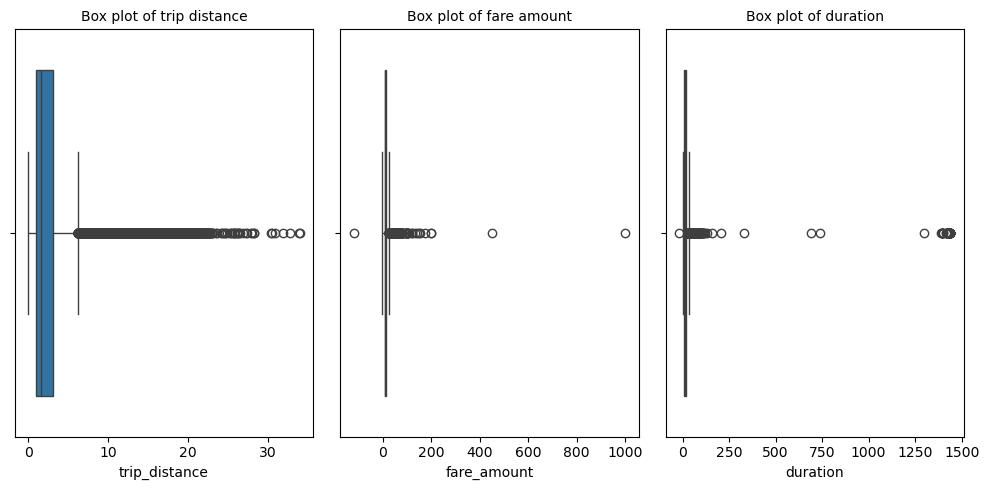

In [22]:
# Box plot of trip_distance, fare_amount and duration
fig, axes = plt.subplots(1, 3, figsize=(10,5))
sns.boxplot(x=df['trip_distance'], ax=axes[0])
axes[0].set_title("Box plot of trip distance", fontsize=10)
sns.boxplot(x=df['fare_amount'], ax=axes[1])
axes[1].set_title("Box plot of fare amount", fontsize=10)
sns.boxplot(x=df['duration'], ax=axes[2])
axes[2].set_title("Box plot of duration", fontsize=10)
plt.tight_layout()

**Observations:**
1. All three variables contain outliers. Some are extreme, but others not so much.
2. The maximum value in trip_distance column is 33.96 miles. It's 30 miles from the southern tip of Staten Island to the northern end of Manhattan and that's in a straight line. With this knowledge and the distribution of the values in this column, it's reasonable to leave these values alone and not alter them.
3. However, the values for fare_amount and duration definitely seem to have problematic outliers on the both the ends.

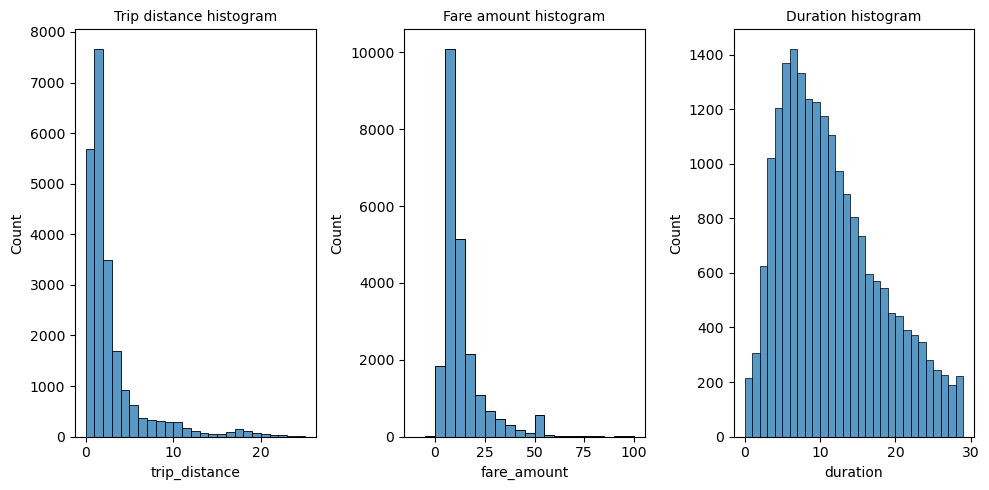

In [24]:
# Histogram of trip_distance, fare_amount and duration
fig, axes = plt.subplots(1, 3, figsize=(10,5))
sns.histplot(df['trip_distance'], ax=axes[0], bins=range(0,26,1))
axes[0].set_title("Trip distance histogram", fontsize=10)
sns.histplot(df['fare_amount'], ax=axes[1], bins=range(-10,101,5))
axes[1].set_title("Fare amount histogram", fontsize=10)
sns.histplot(df['duration'], ax=axes[2], bins=range(0,30,1))
axes[2].set_title("Duration histogram", fontsize=10)
plt.tight_layout()

**Observations**
* The majority of trips were journeys of less than two miles. The number of trips falls away steeply as the distance traveled increases beyond two miles.
  
* The total cost of each trip also has a distribution that skews right, with most costs falling in the $5-15 range.

* Majority of the rides have a duration of 5-12 minutes. 

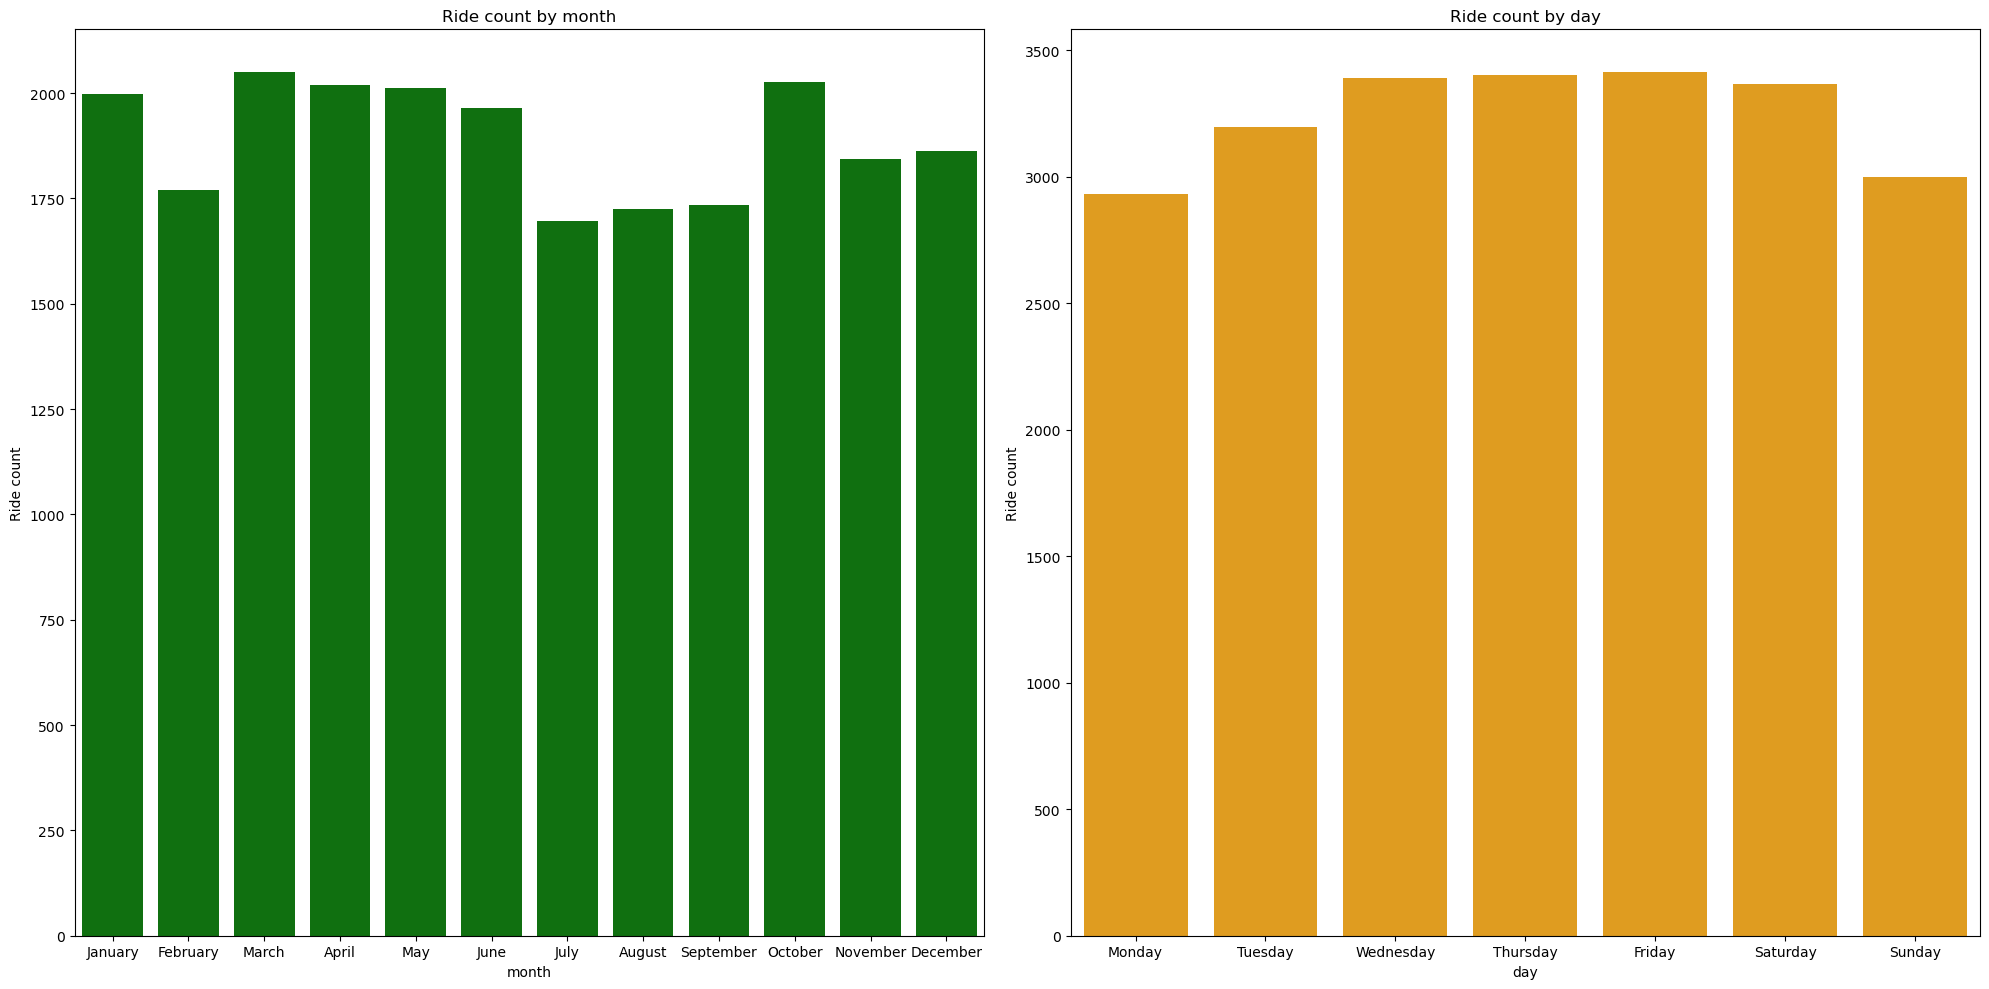

In [26]:
# Total ride count by month and day
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
df['day'] = df['tpep_pickup_datetime'].dt.day_name()
monthly_rides = df['month'].value_counts()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']
fig, axes = plt.subplots(1, 2, figsize=(20,10))
sns.barplot(x=monthly_rides.index, y=monthly_rides, order=month_order, ax=axes[0], color='Green')
axes[0].set_ylabel("Ride count")
axes[0].set_title("Ride count by month")
daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x=daily_rides.index, y=daily_rides, order=day_order, ax=axes[1], color='Orange')
axes[1].set_ylabel("Ride count")
axes[1].set_title("Ride count by day")
plt.tight_layout()

**Observations:** Monthly rides are fairly consistent, with notable dips in the summer months of July, August, and September, and also in February. Suprisingly, Wednesday through Saturday had the highest number of daily rides, while Sunday and Monday had the least.

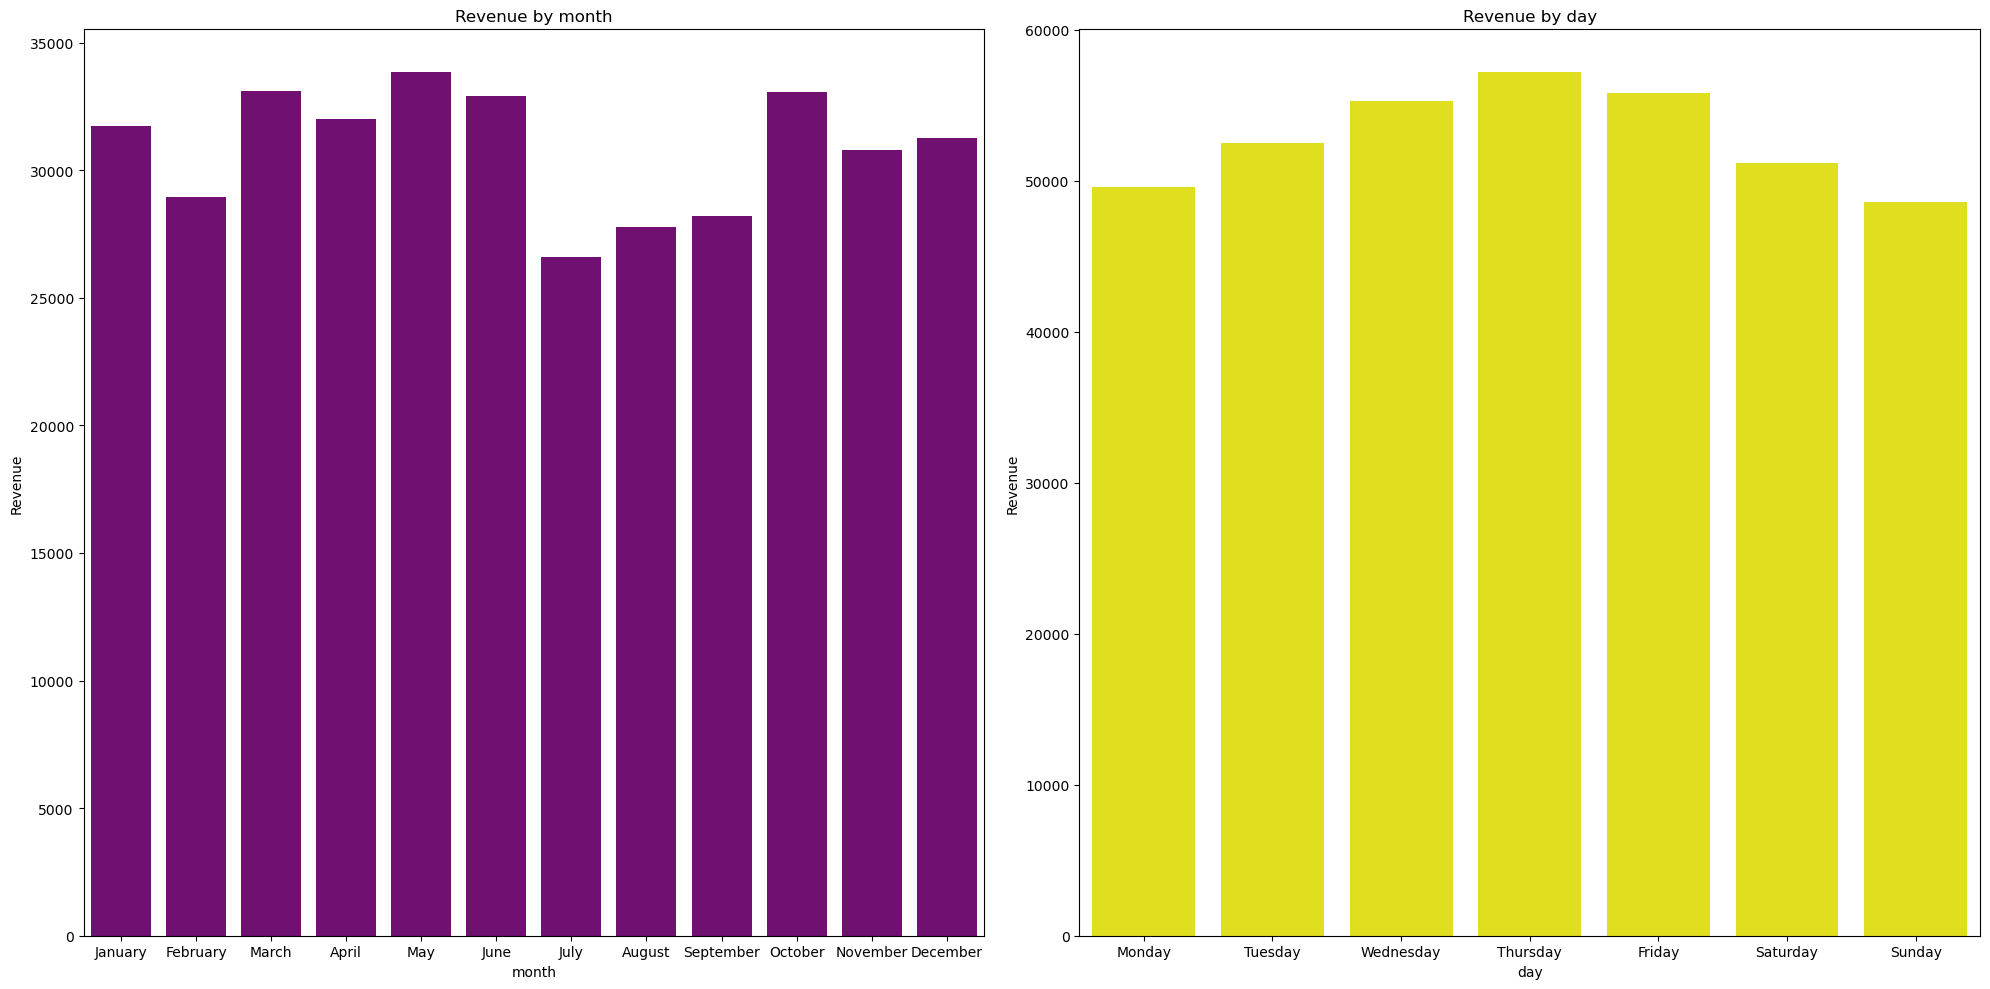

In [28]:
# Total revenue by month and day
monthly_revenue = df.groupby('month')['total_amount'].sum()
daily_revenue = df.groupby('day')['total_amount'].sum()
fig, axes = plt.subplots(1, 2, figsize=(20,10))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue, order=month_order, ax=axes[0], color='Purple')
axes[0].set_ylabel("Revenue")
axes[0].set_title("Revenue by month")
sns.barplot(x=daily_revenue.index, y=daily_revenue, order=day_order, ax=axes[1], color='Yellow')
axes[1].set_ylabel("Revenue")
axes[1].set_title("Revenue by day")
plt.tight_layout()

Text(0.5, 1.0, 'Mean trip distance by drop-off location')

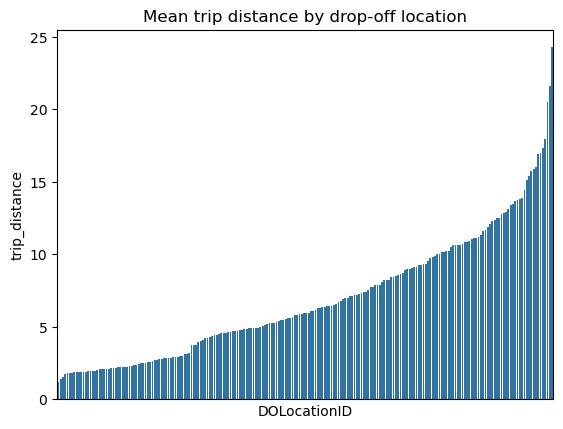

In [29]:
# Mean trip distance by drop-off location
distance_by_dropoff = df.groupby('DOLocationID')['trip_distance'].mean().sort_values()
sns.barplot(x=distance_by_dropoff.index, y=distance_by_dropoff, order=distance_by_dropoff.index)
plt.xticks([])
plt.title('Mean trip distance by drop-off location')

This plot presents a characteristic curve related to the cumulative density function of a normal distribution. In other words, it indicates that the drop-off points are relatively evenly distributed over the terrain. This is good to know, because geographic coordinates were not included in this dataset, so there was no obvious way to test for the distibution of locations.

### **Hypothesis Testing**

In [32]:
# Average fare amount for each payment type
avg_fare_amt = df[['payment_type', 'fare_amount']].groupby('payment_type').mean().rename(columns={'fare_amount': 'Avg fare amount'})
avg_fare_amt

,Avg fare amount
payment_type,
1,13.429748
2,12.213546
3,12.186116
4,9.913043


Based on the averages shown, it appears that customers who pay in credit card tend to pay a larger fare amount than customers who pay in cash. However, this difference might arise from random sampling, rather than being a true difference in fare amount. Hypothesis test is conducted to assess whether the difference is statistically significant.

$H_0$: There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

$H_A$: There is a difference in the average fare amount between customers who use credit cards and customers who use cash.

In [35]:
# Two-sample t-test with 5% significance level
from scipy import stats
fare_amt_CC = df[df['payment_type']==1]['fare_amount']
fare_amt_cash = df[df['payment_type']==2]['fare_amount']
stats.ttest_ind(a=fare_amt_CC, b=fare_amt_cash, equal_var=False)

TtestResult(statistic=6.866800855655372, pvalue=6.797387473030518e-12, df=16675.48547403633)

**Result:** Since the p-value is significantly smaller than the significance level of 5%, we reject the null hypothesis and conclude that there is a statistically significant difference in the average fare amount between customers who use credit cards and customers who use cash. It's far more likely that fare amount determines payment type, rather than vice versa.

### **Handling Outliers**

In [38]:
import datetime as dt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [39]:
# Descriptive stats of trip_distance
df['trip_distance'].describe()

count    22699.000000
mean         2.913313
std          3.653171
min          0.000000
25%          0.990000
50%          1.610000
75%          3.060000
max         33.960000
Name: trip_distance, dtype: float64

In [40]:
# Count of rides where trip_distance is zero
sum(df['trip_distance']==0)

148

148 out of ~23,000 rides is relatively insignificant. We could impute it with a value of 0.01, but it's unlikely to have much of an effect on the model. Therefore, the column will remain untouched with regard to outliers.

In [42]:
# Descriptive stats of fare_amount
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

The range of values in the fare_amount column is large and the extremes don't make much sense.

Low Values: Negative values are problematic. Values of zero could be legitimate if the taxi logged trip that was immediately canceled.

High Values: The maximum fare amount in this dataset is nearly \\$1000 which seems very unlikely. High values for this feature can be capped based on intuition and statistics. The interquantile range (IQR) is \\$8. The standard formula of Q3 + (1.5 * IQR) yeilds \\$26.50. That doesn't seem appropriate for the maximum fare cap. In this case we'll use a factor of 6 which results in a cap of \\$62.50.

In [44]:
# Descriptive stats of duration
df['duration'].describe()

count    22699.000000
mean        17.013766
std         61.996476
min        -16.980000
25%          6.650000
50%         11.180000
75%         18.380000
max       1439.550000
Name: duration, dtype: float64

The duration column has problematic values at both the lower and upper extremities.

Low Values: There should be no values that represent negative time. All negative durations are imputed with 0.

High Values: Impute with Q3 + (6 * IQR).

In [46]:
# Handling Outliers
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        neg_values = sum(df[col]<0)
        print('Count of values reassigned as zero : ', neg_values)
        
        # Reassign negative values to zero
        df.loc[df[col]<0, col] = 0

        # Reassign values > threshold to threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print('Upper threshold: ', upper_threshold)
        out_values = sum(df[col] > upper_threshold)
        print("Count of values reassigned as upper threshold: ", out_values)
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
        print()

In [47]:
outlier_imputer(['fare_amount', 'duration'], 6)

Count of values reassigned as zero :  14
Upper threshold:  62.5
Count of values reassigned as upper threshold:  82
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64

Count of values reassigned as zero :  1
Upper threshold:  88.75999999999999
Count of values reassigned as upper threshold:  71
count    22699.000000
mean        14.460471
std         11.946570
min          0.000000
25%          6.650000
50%         11.180000
75%         18.380000
max         88.760000
Name: duration, dtype: float64



### **Feature Engineering**

**Create mean_distance and mean_duration columns**

When deployed, the model will not know the duration of a trip until after the trip occurs, so we cannot train a model that uses this feature. However, we can use the statistics of trips we do know to generalize about ones we do not know.

In this step, we create a column called mean_distance that captures the mean distance for each group of trips that share pickup and dropfoff points.

For example, 

|Trip|Start|End|Distance|
|:---|:---:|:-:|:------:|
|1   | A   | B | 1   |
|2   | C   | D | 2   |
|3   | A   | B | 1.5 |
|4   | D   | C | 3   |   |


The results are:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```
Then, a new column mean_distance is added where the values at each row is the average for all trips with those pickup and dropoff locations.

In [50]:
# Create mean_distance column
df['pickup_dropoff'] = df['PULocationID'].astype(str) + " " + df['DOLocationID'].astype(str)
grouped_trip_distance = df.groupby(['pickup_dropoff'])['trip_distance'].mean(numeric_only=True)
grouped_trip_distance_dict = grouped_trip_distance.to_dict()
df['mean_distance'] = df['pickup_dropoff'].map(grouped_trip_distance_dict)
df.head()

,ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,month,day,pickup_dropoff,mean_distance
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.5,2.76,0.0,0.3,16.56,14.07,March,Saturday,100 231,3.521667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.5,4.00,0.0,0.3,20.80,26.50,April,Tuesday,186 43,3.108889
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.5,1.45,0.0,0.3,8.75,7.20,December,Friday,262 236,0.881429
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.5,6.39,0.0,0.3,27.69,30.25,May,Sunday,188 97,3.700000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.5,0.00,0.0,0.3,17.80,16.72,April,Saturday,4 112,4.435000


The above process is repeated to create a mean_duration column.

In [52]:
# Create mean_duration column
grouped_duration = df.groupby(['pickup_dropoff'])['duration'].mean(numeric_only=True)
grouped_duration_dict = grouped_duration.to_dict()
df['mean_duration'] = df['pickup_dropoff'].map(grouped_duration_dict)
df.head()

,ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,month,day,pickup_dropoff,mean_distance,mean_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,2.76,0.0,0.3,16.56,14.07,March,Saturday,100 231,3.521667,22.848333
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,4.00,0.0,0.3,20.80,26.50,April,Tuesday,186 43,3.108889,24.470000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,1.45,0.0,0.3,8.75,7.20,December,Friday,262 236,0.881429,7.250286
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,6.39,0.0,0.3,27.69,30.25,May,Sunday,188 97,3.700000,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.00,0.0,0.3,17.80,16.72,April,Saturday,4 112,4.435000,14.620000


**Create rush_hour column**

Rush hour is defined as:
* Any weekday AND
* Either from 06:00-10:00 or from 16:00-20:00

This is a binary column that contains a 1 if the ride was during rush hour and a 0 if it was not. 

In [54]:
# Create 'rush_hour' col
# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour
df.loc[df['day'].isin(['Saturday', 'Sunday']), 'rush_hour'] = 0
df.head()

,ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,month,day,pickup_dropoff,mean_distance,mean_duration,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.07,March,Saturday,100 231,3.521667,22.848333,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.50,April,Tuesday,186 43,3.108889,24.470000,14
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.20,December,Friday,262 236,0.881429,7.250286,7
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.25,May,Sunday,188 97,3.700000,30.250000,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.72,April,Saturday,4 112,4.435000,14.620000,0


In [55]:
# Define rush_hourizer
def rush_hourizer(rush_hour):
    if 6 <= rush_hour <= 10:
        val = 1
    elif 16 <= rush_hour <= 20:
        val = 1
    else:
        val = 0
    return val

df['rush_hour'] = df['rush_hour'].apply(rush_hourizer)
df.head()

,ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,month,day,pickup_dropoff,mean_distance,mean_duration,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.07,March,Saturday,100 231,3.521667,22.848333,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.50,April,Tuesday,186 43,3.108889,24.470000,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.20,December,Friday,262 236,0.881429,7.250286,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.25,May,Sunday,188 97,3.700000,30.250000,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.72,April,Saturday,4 112,4.435000,14.620000,0


<Axes: xlabel='mean_duration', ylabel='fare_amount'>

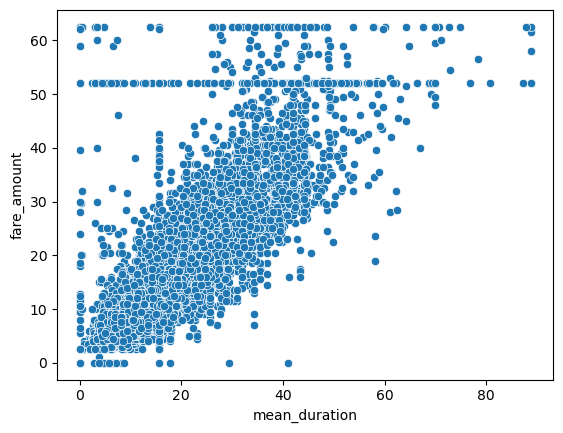

In [56]:
sns.scatterplot(x=df['mean_duration'], y=df['fare_amount'])

The horizontal line at 62.5 is because of capping of the outliers in the fare_amount. The line at 52 is further checked below.

In [58]:
df[df['fare_amount']>50]['fare_amount'].value_counts()

fare_amount
52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
51.0      7
60.0      6
55.0      6
51.5      6
53.0      4
52.5      4
61.0      3
62.0      3
55.5      3
56.0      3
56.5      3
58.5      2
59.5      2
61.5      2
57.0      2
54.0      2
58.0      1
54.7      1
54.5      1
Name: count, dtype: int64

There are 514 trips whose rides were \\$52.

In [60]:
pd.set_option('display.max_columns', None)
print(df[df['fare_amount']==52][['PULocationID']].value_counts())
print(df[df['fare_amount']==52][['DOLocationID']].value_counts())
df[df['fare_amount']==52].head(20)

PULocationID
132             292
264              15
163              13
170              13
230               9
               ... 
140               1
145               1
148               1
151               1
265               1
Name: count, Length: 62, dtype: int64
DOLocationID
132             179
230              32
48               25
162              18
161              15
               ... 
244               1
70                1
145               1
42                1
265               1
Name: count, Length: 63, dtype: int64


,ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,month,day,pickup_dropoff,mean_distance,mean_duration,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.80,March,Sunday,236 132,19.211667,40.496667,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.85,June,Saturday,132 163,19.229000,52.943000,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.97,November,Saturday,132 132,2.255862,3.022414,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.18,December,Wednesday,132 79,19.431667,47.273333,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.48,September,Sunday,132 234,17.654000,49.834000,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.83,February,Tuesday,132 48,18.761905,58.244762,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.62,June,Monday,228 88,4.730000,15.620000,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.45,August,Thursday,132 48,18.761905,58.244762,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.85,September,Tuesday,186 132,17.096000,42.922000,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.58,April,Sunday,132 148,17.994286,46.340000,0


**Observation:** It seems that the fare amount of \\$52 either begin or end at location 132, and all of them have a RateCodeID of 2.

There is no readily apparent reason why PULocation 132 should have so many fares of 52 dollars. They seem to occur on all different days, at different times, with both vendors, in all months. However, there are many toll amounts of \\$5.76 and \\$5.54. This would seem to indicate that location 132 is in an area that frequently requires tolls to get to and from. It's likely this is an airport.

The data dictionary says that RateCodeID of 2 indicates trips for JFK , which is John F Kennedy International Airport. A quick Google search for "new york city taxi flat rate \\$52" inidcates that in 2017 there was indeed a flat fare for taxi trips between JFK airport and Manhattan.

## **PACE: Construct**
This stage consists of following tasks:
1. Identify variables
2. Create holdout and validation samples
3. Build the models
4. Evaluate and choose the best model
5. Use the best model to predict on test data

In [63]:
# Isolate modeling variables
model_data = df[['fare_amount', 'mean_duration', 'mean_distance', 'passenger_count', 'VendorID', 'rush_hour']]

# Change categorical variable into string format
model_data['VendorID'] = model_data['VendorID'].astype('str')

# Categorical Variable Encoding
model_data = pd.get_dummies(model_data, drop_first = True, dtype = int)
model_data.head()

C:\Users\Dhananjay\AppData\Local\Temp\ipykernel_11460\433436985.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['VendorID'] = model_data['VendorID'].astype('str')


,fare_amount,mean_duration,mean_distance,passenger_count,rush_hour,VendorID_2
0,13.0,22.848333,3.521667,6,0,1
1,16.0,24.470000,3.108889,1,0,0
2,6.5,7.250286,0.881429,1,1,0
3,20.5,30.250000,3.700000,1,0,1
4,16.5,14.620000,4.435000,1,0,1


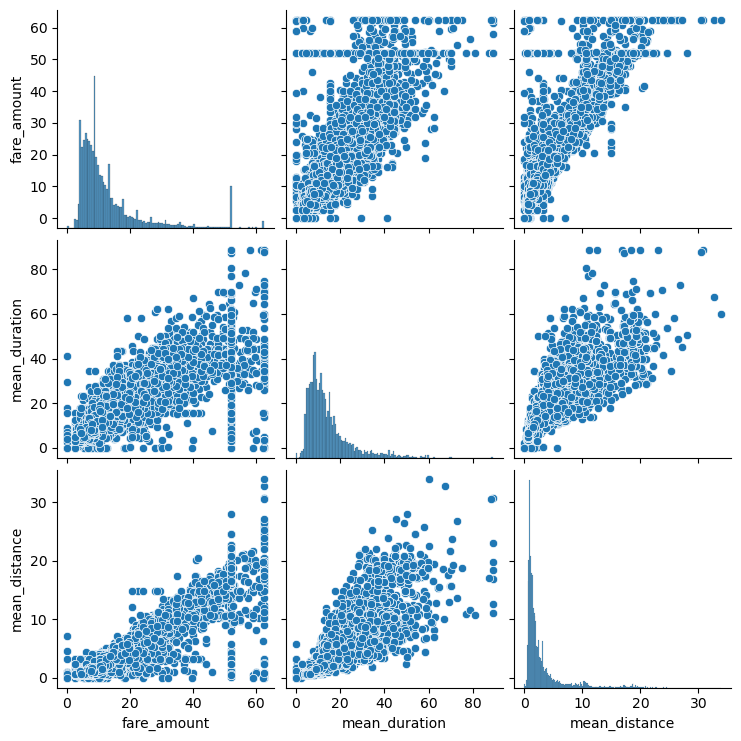

In [64]:
sns.pairplot(model_data[['fare_amount', 'mean_duration', 'mean_distance']])

**Observation:** These variables all show linear correlation with each other.

### **Identify correlations**

In [67]:
model_data.corr(method='pearson')

,fare_amount,mean_duration,mean_distance,passenger_count,rush_hour,VendorID_2
fare_amount,1.000000,0.859111,0.910185,0.014942,-0.025901,0.001045
mean_duration,0.859111,1.000000,0.874870,0.015853,-0.027500,0.001876
mean_distance,0.910185,0.874870,1.000000,0.013428,-0.046794,0.004741
passenger_count,0.014942,0.015853,0.013428,1.000000,-0.024283,0.266463
rush_hour,-0.025901,-0.027500,-0.046794,-0.024283,1.000000,-0.000752
VendorID_2,0.001045,0.001876,0.004741,0.266463,-0.000752,1.000000


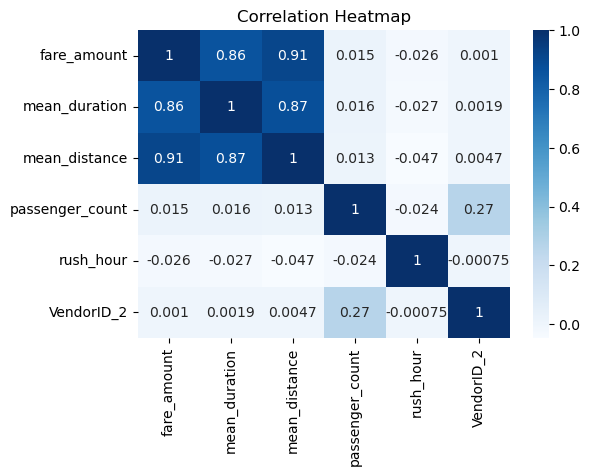

In [68]:
plt.figure(figsize=(6,4))
sns.heatmap(model_data.corr(method='pearson'), annot=True, cmap='Blues')
plt.title('Correlation Heatmap',
          fontsize=12)
plt.show()

**Observation:** mean_duration and mean_distance are both highly correlated with the target variable of fare_amount. They are also both correlated with each other, with a Pearson correlation of 0.87.

Both variables are used in the model, since, the model is used for predicting the fare amount and not for drawing statistical inferences about the data from the model.

### **Regression Model**

The following steps are performed:
1. The data is split into training, validation and test sets.
2. Four different ML models are constructed and trained on the training data. The four models are namely: Multiple linear regression, Single tuned decision tree, Random Forest and XGBoost.
3. The hyperparameters are tuned using cross-validation on the training set.
4. The tuned models are then used to predict on the validation set.
5. A champion model is selected based on performance on the validation set.
6. This champion model alone is used to predict on the test data to get a truly objective idea of how the model would perform on new, unseen data.

#### **Multiple Linear Regression (OLS) Model**

In [72]:
# Construct Model
import sklearn.metrics as metrics
y = model_data['fare_amount']
x = model_data[['mean_distance', 'mean_duration', 'passenger_count', 'VendorID_2', 'rush_hour']]

# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Split the training data in training and validation set
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)


# Create data for modeling
ols_data = pd.concat([x_tr, y_tr], axis=1)

ols_formula_1 = "fare_amount ~ mean_distance + mean_duration + C(passenger_count) + C(VendorID_2) + C(rush_hour)"

OLS_1 = ols(formula = ols_formula_1, data=ols_data)

ols_model_1 = OLS_1.fit()

print(ols_model_1.summary())
y_pred_val = ols_model_1.predict(x_val)
print('\nPerformance Scores on Validation Data')
print("R2: ", metrics.r2_score(y_val, y_pred_val))
print('MAE:', metrics.mean_absolute_error(y_val, y_pred_val))
print('MSE:', metrics.mean_squared_error(y_val, y_pred_val))

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     7132.
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:14:04   Log-Likelihood:                -41972.
No. Observations:               14527   AIC:                         8.397e+04
Df Residuals:                   14516   BIC:                         8.405e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

The P Values for passenger_count and VendorID is greater than 0.05. This indicates that these variables do not assist in predicting the fare amount. Hence, they are dropped in model_2 below.

In [74]:
# Drop passenger_count and VendorID from train, validation and test dataset
x_tr = x_tr.drop(['passenger_count', 'VendorID_2'], axis = 1)
x_val = x_val.drop(['passenger_count', 'VendorID_2'], axis = 1)
x_test = x_test.drop(['passenger_count', 'VendorID_2'], axis = 1)

# Construct new ols model
ols_formula_2 = "fare_amount ~ mean_distance + mean_duration + C(rush_hour)"

ols_data = pd.concat([x_tr, y_tr], axis=1)

OLS_2 = ols(formula = ols_formula_2, data=ols_data)

ols_model_2 = OLS_2.fit()

print(ols_model_2.summary())
y_pred_val_ols = ols_model_2.predict(x_val)
print('\nPerformance Scores on Validation Data')
R2_ols = np.round(metrics.r2_score(y_val, y_pred_val_ols), 4)
MAE_ols = np.round(metrics.mean_absolute_error(y_val, y_pred_val_ols), 4)
MSE_ols = np.round(metrics.mean_squared_error(y_val, y_pred_val_ols), 4)
print('R2: ', R2_ols)
print('MAE:', MAE_ols)
print('MSE:', MSE_ols)

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                 2.374e+04
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:14:04   Log-Likelihood:                -41984.
No. Observations:               14527   AIC:                         8.398e+04
Df Residuals:                   14523   BIC:                         8.401e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.0327      0.07

#### Model Evaluation

The model performance is high on both training and validation sets. In fact, the scores are better on validation set than on training set, suggesting that there is a little bias in the model and that the model is not overfit. 

In [77]:
results_ols = pd.DataFrame(data={'Actual': y_val,
                             'Predicted': y_pred_val_ols})
results_ols['Residual'] = results_ols['Actual'] - results_ols['Predicted']
results_ols.head()

,Actual,Predicted,Residual
1042,8.0,8.120468,-0.120468
17137,4.5,7.619819,-3.119819
11806,23.0,22.174765,0.825235
7733,7.0,9.199978,-2.199978
8610,6.5,7.088822,-0.588822


Mean Value: -0.15927219493036673


Text(0.5, 1.0, 'Distribution of the residuals')

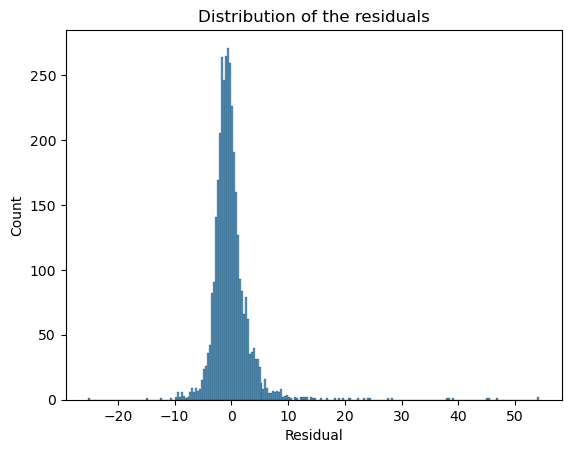

In [78]:
sns.histplot(results_ols['Residual'])
print("Mean Value:", results_ols['Residual'].mean())
plt.title("Distribution of the residuals")

**Result:** The distribution of the residuals is approximately normal and has a mean of -0.16. A normal distribution around zero is good, as it demonstrates that the model's errors are evenly distributed and unbiased.

Text(0.5, 1.0, 'Scatterplot of residuals over predicted values')

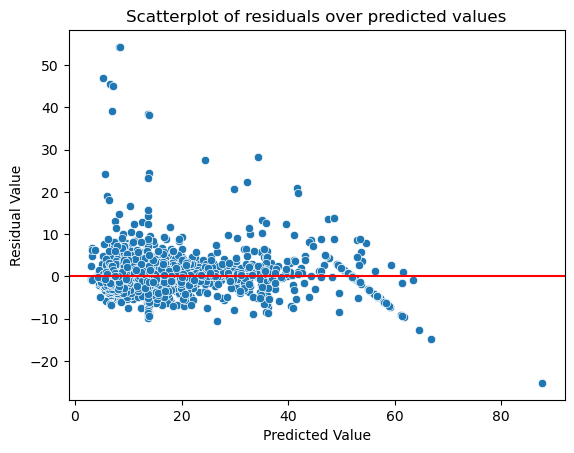

In [80]:
sns.scatterplot(x='Predicted', y='Residual', data=results_ols)
plt.axhline(0, c='red')
plt.xlabel("Predicted Value")
plt.ylabel("Residual Value")
plt.title("Scatterplot of residuals over predicted values")

The model's residuals are evenly distributed above and below zero, with the exception of the sloping lines from upper-left corner which are the imputed maximum of \\$62.50 and the flat rate of \\$52 for JFK airport trips.

#### **Single Tuned Decision Tree**

The best value for hyperparameter `max_depth` is found by using Grid Search and cross-validation.

In [83]:
# Define hyperparameters for tuning
tree_params = {'max_depth': [2, 5, 10]}
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

In [84]:
# Grid Search
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
decision_tree = DecisionTreeRegressor(random_state = 0)
decision_tree_cv = GridSearchCV(decision_tree, tree_params, scoring = scoring, cv = 5, refit = 'r2')

In [85]:
# Fit the training data into model
decision_tree_cv.fit(x_tr, y_tr)

# Best hyperparameters and average validation score
print(decision_tree_cv.best_estimator_)
print(decision_tree_cv.best_score_)

DecisionTreeRegressor(max_depth=5, random_state=0)
0.8298460708600255


In [86]:
# Predict on validation set
tuned_decision_tree = decision_tree_cv.best_estimator_
y_pred_val_dt = tuned_decision_tree.predict(x_val)
print("\nPerformance Scores on Validation Data")
R2_dt = np.round(metrics.r2_score(y_val, y_pred_val_dt), 4)
MAE_dt = np.round(metrics.mean_absolute_error(y_val, y_pred_val_dt), 4)
MSE_dt = np.round(metrics.mean_squared_error(y_val, y_pred_val_dt), 4)
print('R2: ', R2_dt)
print('MAE:', MAE_dt)
print('MSE:', MSE_dt)


Performance Scores on Validation Data
R2:  0.8725
MAE: 2.2784
MSE: 14.1245


#### **Random Forest Model**

In [88]:
# Define hyperparameters for tuning
tree_params_rf = {'max_depth': [2, 5, 10],
                 'n_estimators': [50, 100, 200]}

In [89]:
# Grid Search
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 0)
rf_cv = GridSearchCV(rf, tree_params_rf, scoring = scoring, cv = 5, refit = 'r2')

In [ ]:
%%time
# Fit the training data into model
rf_cv.fit(x_tr, y_tr)

# Best hyperparameters and average validation score
print(rf_cv.best_estimator_)
print(rf_cv.best_score_)

In [ ]:
%%time
# Predict on validation set
tuned_rf = rf_cv.best_estimator_
y_pred_val_rf = tuned_rf.predict(x_val)
print("\nPerformance Scores on Validation Data")
R2_rf = np.round(metrics.r2_score(y_val, y_pred_val_rf), 4)
MAE_rf = np.round(metrics.mean_absolute_error(y_val, y_pred_val_rf), 4)
MSE_rf = np.round(metrics.mean_squared_error(y_val, y_pred_val_rf), 4)
print('R2: ', R2_rf)
print('MAE:', MAE_rf)
print('MSE:', MSE_rf)

#### **XGBoost Model**

In [ ]:
# Define hyperparameters for tuning
tree_params_xgb = {'max_depth': [2, 5, 10],
                 'n_estimators': [50, 100, 200],
                 'learning_rate': [0.01, 0.1, 0.2]}

In [ ]:
#!pip install xgboost

In [ ]:
# Grid Search
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state = 0)
xgb_cv = GridSearchCV(xgb, tree_params_xgb, scoring = scoring, cv = 5, refit = 'r2')

In [ ]:
%%time
# Fit the training data into model
xgb_cv.fit(x_tr, y_tr)

# Best hyperparameters and average validation score
print(xgb_cv.best_estimator_)
print(xgb_cv.best_score_)

In [ ]:
%%time
# Predict on validation set
tuned_xgb = xgb_cv.best_estimator_
y_pred_val_xgb = tuned_xgb.predict(x_val)
print("\nPerformance Scores on Validation Data")
R2_xgb = np.round(metrics.r2_score(y_val, y_pred_val_xgb), 4)
MAE_xgb = np.round(metrics.mean_absolute_error(y_val, y_pred_val_xgb), 4)
MSE_xgb = np.round(metrics.mean_squared_error(y_val, y_pred_val_xgb), 4)
print('R2: ', R2_xgb)
print('MAE:', MAE_xgb)
print('MSE:', MSE_xgb)

## **PACE: Execute**

This step involves interpretation and visualization of results. The model with the best performance is then used for predicting on test data. 
The model's performance is evaluated based on Mean Squared Error score (coefficient of determination) which measures the average squared difference between the observed and predicted values.

#### **Validation Results**

In [ ]:
# Consolidated results from different models
results_overall = pd.DataFrame({'Model Name': ['Multiple Linear Regression', 'Single Tuned Decision Tree', 'Random Forest', 'XGBoost'],
                       'R2': [R2_ols, R2_dt, R2_rf, R2_xgb],
                       'MAE': [MAE_ols, MAE_dt, MAE_rf, MAE_xgb],
                       'MSE': [MSE_ols, MSE_dt, MSE_rf, MSE_xgb]})
results_overall = results_overall.sort_values(by = 'MSE', ascending = True).reset_index(drop = True)
results_overall

The results indicate that the Multiple Linear Regression Model outperforms the other models, achieving the lowest average error. One possible reason could be that the relationship in the data is genuinely linear. In that case, multiple linear regression performs exceptionally well because it is explicitly designed for this purpose. On the other hand, Decision Tree, Random Forest or XGBoost (which are non-linear models) might overcomplicate or underfit the data if the true relationship is more straightforward and linear.

#### **Performance on Test Data**

In [ ]:
# Predict on test data
y_pred_test_ols = ols_model_2.predict(x_test)

In [ ]:
# Performance Scores
print(ols_model_2.summary())
print("\nPerformance Scores on Test Data")
print("R2: ", np.round(metrics.r2_score(y_test, y_pred_test_ols), 4))
print("MAE: ", np.round(metrics.mean_absolute_error(y_test, y_pred_test_ols), 4))
print("MSE: ", np.round(metrics.mean_squared_error(y_test, y_pred_test_ols), 4))     

In [ ]:
# Table of Residuals
results_test = pd.DataFrame(data={'Actual': y_test,
                             'Predicted': y_pred_test_ols})
results_test['Residual'] = results_test['Actual'] - results_test['Predicted']
results_test.head()

In [ ]:
# Visulization of actual vs predicted values
sns.scatterplot(x='Actual', y='Predicted', data = results_test)
plt.title("Actual vs. Predicted")
plt.plot([0,60], [0,60], c='red', linewidth=2)